# 1. Loading Libraries

In [1]:
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib

In [2]:
from community import community_louvain
from PIL import ImageColor
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import numpy as np
import regex as re
import os

# 2.Loading DataSets

In [3]:
#Define here you local Path
your_path='C:\\Users\\gerso\\Google Drive\\Acadêmicos\Dados'

In [4]:
os.getcwd() #Check currel local directory

'C:\\Users\\gerso\\OneDrive - usp.br\\Academicos\\Dissertacao_USP'

In [5]:
os.chdir(your_path) #Set you local directory

In [6]:
#Reading Pajek pre defined networks files and B3 Economic Sectors definition file
rede_pre=nx.read_pajek("C:\\Users\\gerso\\Google Drive\\Acadêmicos\\Dados\\Pré Crise x Pos Crise -2 Anos\\Pre Crise\\MST_Pre.net",encoding='UTF-8')
rede_pos=nx.read_pajek("C:\\Users\\gerso\\Google Drive\\Acadêmicos\\Dados\\Pré Crise x Pos Crise -2 Anos\\Pos Crise\\MST_PosCrise.net",encoding='UTF-8')
setores=pd.read_excel("C:\\Users\\gerso\\Google Drive\\Acadêmicos\Dados\\ClassifSetorial\\Setorial B3 01-06-2017 (português).xls",sheet_name='Setores', skiprows=7)

# 3. Designing The Pre Elections Correlation Network 
This this our specific case study.However, you can use this code as example for drawing B3 correlations networks coloring by economic sectors or modularity by using Kamada Kawai layout. Our topological parameters are:
1- Nodes width are the original correlaions values
2- Nodes colors are economisc clusters or mpodularity clusters
3- Kamada Kawai Layout

## 3.1 Setting the Nodes Width

In [7]:
pesos_pre=pd.DataFrame(list(nx.get_edge_attributes(rede_pre,'weight')))
dij_pre=pd.DataFrame(list(nx.get_edge_attributes(rede_pre,'weight').values()))
cij_pre=1-((dij_pre**2)/2)
pesos_pre[2]=dij_pre

In [8]:
#Trasnforming Pajek Nx.Multigraph into Nx.Graph
def refazer_rede(Pajek_MultiGraph):
    G=nx.Graph()
    for index,row in Pajek_MultiGraph.iterrows():
           G.add_edge(row[0],row[1],weight=row[2])
    return(G)

In [9]:
rede_pre=refazer_rede(pesos_pre)
pesos_pre[2]=cij_pre

## 3.2 Cleaning Economic Sectors Text Data

In [10]:
def clean(texto):
    return re.sub('\d', '', texto)

In [11]:
nos_pre0=pd.DataFrame(rede_pre.nodes())
nos_pre0.columns=['CÓDIGO']
nos_pre0['CÓDIGO']=nos_pre0['CÓDIGO'].astype(str)
setores['CÓDIGO']=setores['CÓDIGO'].astype(str)

In [12]:
nos_pre0['CODIGO']=nos_pre0['CÓDIGO'].apply(lambda x: clean(x))
setores['CODIGO']=setores['CÓDIGO'].apply(lambda x: clean(x))

In [13]:
nos_pre2=nos_pre0.merge(setores, on='CODIGO', how='left').fillna('Outros').drop_duplicates(subset=['CÓDIGO_x'])
nos_pre2.rename(columns={'Unnamed: 0':'SETOR ECONÔMICO', 'Unnamed: 1':'SUBSETOR','Unnamed: 2':'EMPRESA'}, inplace=True)

In [14]:
nos_pre3=pd.DataFrame(nos_pre2[['CÓDIGO_x','SUBSETOR']].groupby('SUBSETOR'))

In [15]:
sectors=['Farming',\
         'Food Processors',\
         'Analysis and Diagnostics',\
         'Automobiles and Motorcycles',\
         'Beverages',\
         'Hardware and Equipments',\
         'Retail',\
         'Retail and Distribution',\
         'Heavy Construction',\
         'Construction and Engineering ',\
         'Diversified',\
         'Electric Utilities',\
         'Real Estate',\
         'Gas Utilities',\
         'Holdings - Diversified',\
         'Hotels and Restaurants',\
         'Financial Intermediaries',\
         'Wood and Paper',\
         'Diversified Materials',\
         'Transportation Equipment and Components',\
         'Mining',\
         'Machines and Equipments',\
         'Others',\
         'Oil, Gas and Biofuels',\
         'Insurance, Life and Multi-line',\
         'Personal Care and Cleaning',\
         'Software and Services',\
         'Chemicals',\
         'Diversified Services',\
         'Diversified Financial Services',\
         'Steel and Metalurgy',\
         'Textiles, Apparel and Footwear',\
         'Telecommunications',\
         'Transportation',\
         'Household Products',\
         'Travel, Entertainment and Leisure',\
         'Water Utilies']

In [16]:
nos_pre3[0]=sectors

## 3.3 Defining a Color Map for Each Subsector

In [17]:
color_map=[]
for node in rede_pre:
    if node in nos_pre3[1][0]['CÓDIGO_x'].values:
        color_map.append('#D2691E')#chocolate
    if node in nos_pre3[1][1]['CÓDIGO_x'].values:
        color_map.append('#F4A460')#sandybrown
    if node in nos_pre3[1][2]['CÓDIGO_x'].values:
        color_map.append('#D8BFD8')#thistle
    if node in nos_pre3[1][3]['CÓDIGO_x'].values:
        color_map.append('#ADFF2F')#greenyellow
    if node in nos_pre3[1][4]['CÓDIGO_x'].values:
        color_map.append('#9370DB')#mediumpurple
    if node in nos_pre3[1][5]['CÓDIGO_x'].values:
        color_map.append('#F0E68C')#khaki
    if node in nos_pre3[1][6]['CÓDIGO_x'].values:
        color_map.append('#FFE4B5')#moccasin
    if node in nos_pre3[1][7]['CÓDIGO_x'].values:
        color_map.append('#D2B48C')#tan
    if node in nos_pre3[1][8]['CÓDIGO_x'].values:
        color_map.append('#4682B4')#steelblue
    if node in nos_pre3[1][9]['CÓDIGO_x'].values:
        color_map.append('#5F9EA0')#cadetblue
    if node in nos_pre3[1][10]['CÓDIGO_x'].values:
        color_map.append('#87CEEB')#skyblue
    if node in nos_pre3[1][11]['CÓDIGO_x'].values:
        color_map.append('#A9A9A9')#darkgray
    if node in nos_pre3[1][12]['CÓDIGO_x'].values:
        color_map.append('#7B68EE')#mediumslateblue
    if node in nos_pre3[1][13]['CÓDIGO_x'].values:
        color_map.append('#D3D3D3')#lightgrey
    if node in nos_pre3[1][14]['CÓDIGO_x'].values:
        color_map.append('#F08080')#lightcoral
    if node in nos_pre3[1][15]['CÓDIGO_x'].values:
        color_map.append('#FFFF00')#yellow
    if node in nos_pre3[1][16]['CÓDIGO_x'].values:
        color_map.append('#CD5C5C')#indianred
    if node in nos_pre3[1][17]['CÓDIGO_x'].values:
        color_map.append('#66CDAA')#mediumaquamarine
    if node in nos_pre3[1][18]['CÓDIGO_x'].values:
        color_map.append('#3CB371')#mediumspringgreen
    if node in nos_pre3[1][19]['CÓDIGO_x'].values:
        color_map.append('#AFEEEE')#paletturquoise
    if node in nos_pre3[1][20]['CÓDIGO_x'].values:
        color_map.append('#32CD32')#limegreen
    if node in nos_pre3[1][21]['CÓDIGO_x'].values:
        color_map.append('#B0E0E6')#powderblue
    if node in nos_pre3[1][22]['CÓDIGO_x'].values:
        color_map.append('#FFB6C1')#lightpink
    if node in nos_pre3[1][23]['CÓDIGO_x'].values:
        color_map.append('#228B22')#forestgreen
    if node in nos_pre3[1][24]['CÓDIGO_x'].values:
        color_map.append('#BC8F8F')#rosybrown
    if node in nos_pre3[1][25]['CÓDIGO_x'].values:
        color_map.append('#FFDAB9')#peachpuff
    if node in nos_pre3[1][26]['CÓDIGO_x'].values:
        color_map.append('#EEE8AA')#palegoldenrod
    if node in nos_pre3[1][27]['CÓDIGO_x'].values:
        color_map.append('#8FBC8F')#darkseagreen
    if node in nos_pre3[1][28]['CÓDIGO_x'].values:
        color_map.append('#40E0D0')#turqoise
    if node in nos_pre3[1][29]['CÓDIGO_x'].values:
        color_map.append('#FFA07A')#lightsalmon
    if node in nos_pre3[1][30]['CÓDIGO_x'].values:
        color_map.append('#98FB98')#palegreen
    if node in nos_pre3[1][31]['CÓDIGO_x'].values:
        color_map.append('#1E90FF')#dodgerblue
    if node in nos_pre3[1][32]['CÓDIGO_x'].values:
        color_map.append('#DDA0DD')#plum
    if node in nos_pre3[1][33]['CÓDIGO_x'].values:
        color_map.append('#008B8B')#darkcyan
    if node in nos_pre3[1][34]['CÓDIGO_x'].values:
        color_map.append('#808000')#olive
    if node in nos_pre3[1][35]['CÓDIGO_x'].values:
        color_map.append('#708090')#slategrey
    if node in nos_pre3[1][36]['CÓDIGO_x'].values:
        color_map.append('#808080')#gray
len(color_map)

199

In [18]:
# Color list for each subsector
colors_hex=['#D2691E','#F4A460','#D8BFD8','#ADFF2F','#9370DB','#F0E68C','#FFE4B5','#D2B48C','#4682B4',\
       '#5F9EA0','#87CEEB','#A9A9A9','#7B68EE','#D3D3D3','#F08080','#FFFF00','#CD5C5C','#66CDAA',\
       '#3CB371','#AFEEEE','#32CD32','#B0E0E6','#FFB6C1','#228B22','#BC8F8F','#FFDAB9','#EEE8AA',\
       '#8FBC8F','#40E0D0','#FFA07A','#98FB98','#1E90FF','#DDA0DD','#008B8B','#808000','#708090','#808080']

In [19]:
#Converting to RGB
colors_rgb=[]
for i in range(len(colors_hex)):
    colors_rgb.append(matplotlib.colors.to_rgb(colors_hex[i]))
#colors_rgb

## 3.3 Createing a Subsector Color Dictionary 

In [20]:
listK = sectors
listV = colors_rgb
res = {}
# Convert to dictionary
for key in listK:
    for value in listV:
        res[key] = value
        listV.remove(value)
        break

## 3.4 Drawing Subsector Legends for the Network

In [21]:
legenda=pd.DataFrame([sectors,colors_rgb]).T
legenda.rename(columns={0:'Sectors',1:'Colors'},inplace=True)

In [22]:
def plot_colortable(colors, title, sort_colors=True, emptycols=0):
    dpi=300
    cell_width = 212
    cell_height = 22
    swatch_width = 48
    margin = 12
    topmargin = 40

    # Sort colors by hue, saturation, value and name.
    if sort_colors is True:
        by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgb(color))),
                         name)
                        for name, color in colors.items())
        names = [name for hsv, name in by_hsv]
    else:
        names = list(colors)

    n = len(names)
    ncols = 4 - emptycols
    nrows = n // ncols + int(n % ncols > 0)

    width = cell_width * 4 + 2 * margin
    height = cell_height * nrows + margin + topmargin
    dpi = 72

    fig, ax = plt.subplots(figsize=(width / dpi, height / dpi), dpi=dpi)
    fig.subplots_adjust(margin/width, margin/height,
                        (width-margin)/width, (height-topmargin)/height)
    plt.rcParams['font.family'] = 'serif'
    plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
    ax.set_xlim(0, cell_width * 4)
    ax.set_ylim(cell_height * (nrows-0.5), -cell_height/2.)
    ax.yaxis.set_visible(False)
    ax.xaxis.set_visible(False)
    ax.set_axis_off()
    ax.set_title(title, fontsize=12, loc="left", pad=10)

    for i, name in enumerate(names):
        row = i % nrows
        col = i // nrows
        y = row * cell_height

        swatch_start_x = cell_width * col
        text_pos_x = cell_width * col + swatch_width + 7
        plt.rcParams['font.family'] = 'serif'
        plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

        ax.text(text_pos_x, y, name, fontsize=12,
                horizontalalignment='left',
                verticalalignment='center')

        ax.add_patch(
            Rectangle(xy=(swatch_start_x, y-9), width=swatch_width,
                      height=18, facecolor=colors[name])
        )

    return fig

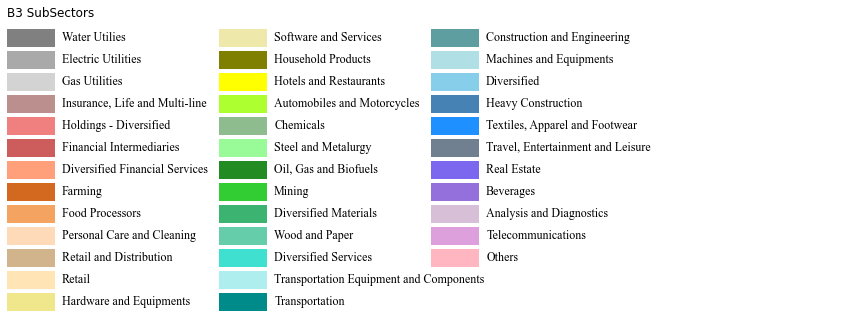

In [23]:
plot_colortable(res, "B3 SubSectors",sort_colors=True, emptycols=1)
# plot_colortable(mcolors.TABLEAU_COLORS, "Tableau Palette",
#                 sort_colors=False, emptycols=2)

# plot_colortable(mcolors.CSS4_COLORS, "CSS Colors")

# # Optionally plot the XKCD colors (Caution: will produce large figure)
# #xkcd_fig = plot_colortable(mcolors.XKCD_COLORS, "XKCD Colors")
plt.savefig("Sectors_legend.png",dpi=300)
plt.show()

## 3.5 Drawning the Net - groups by economy subsectors

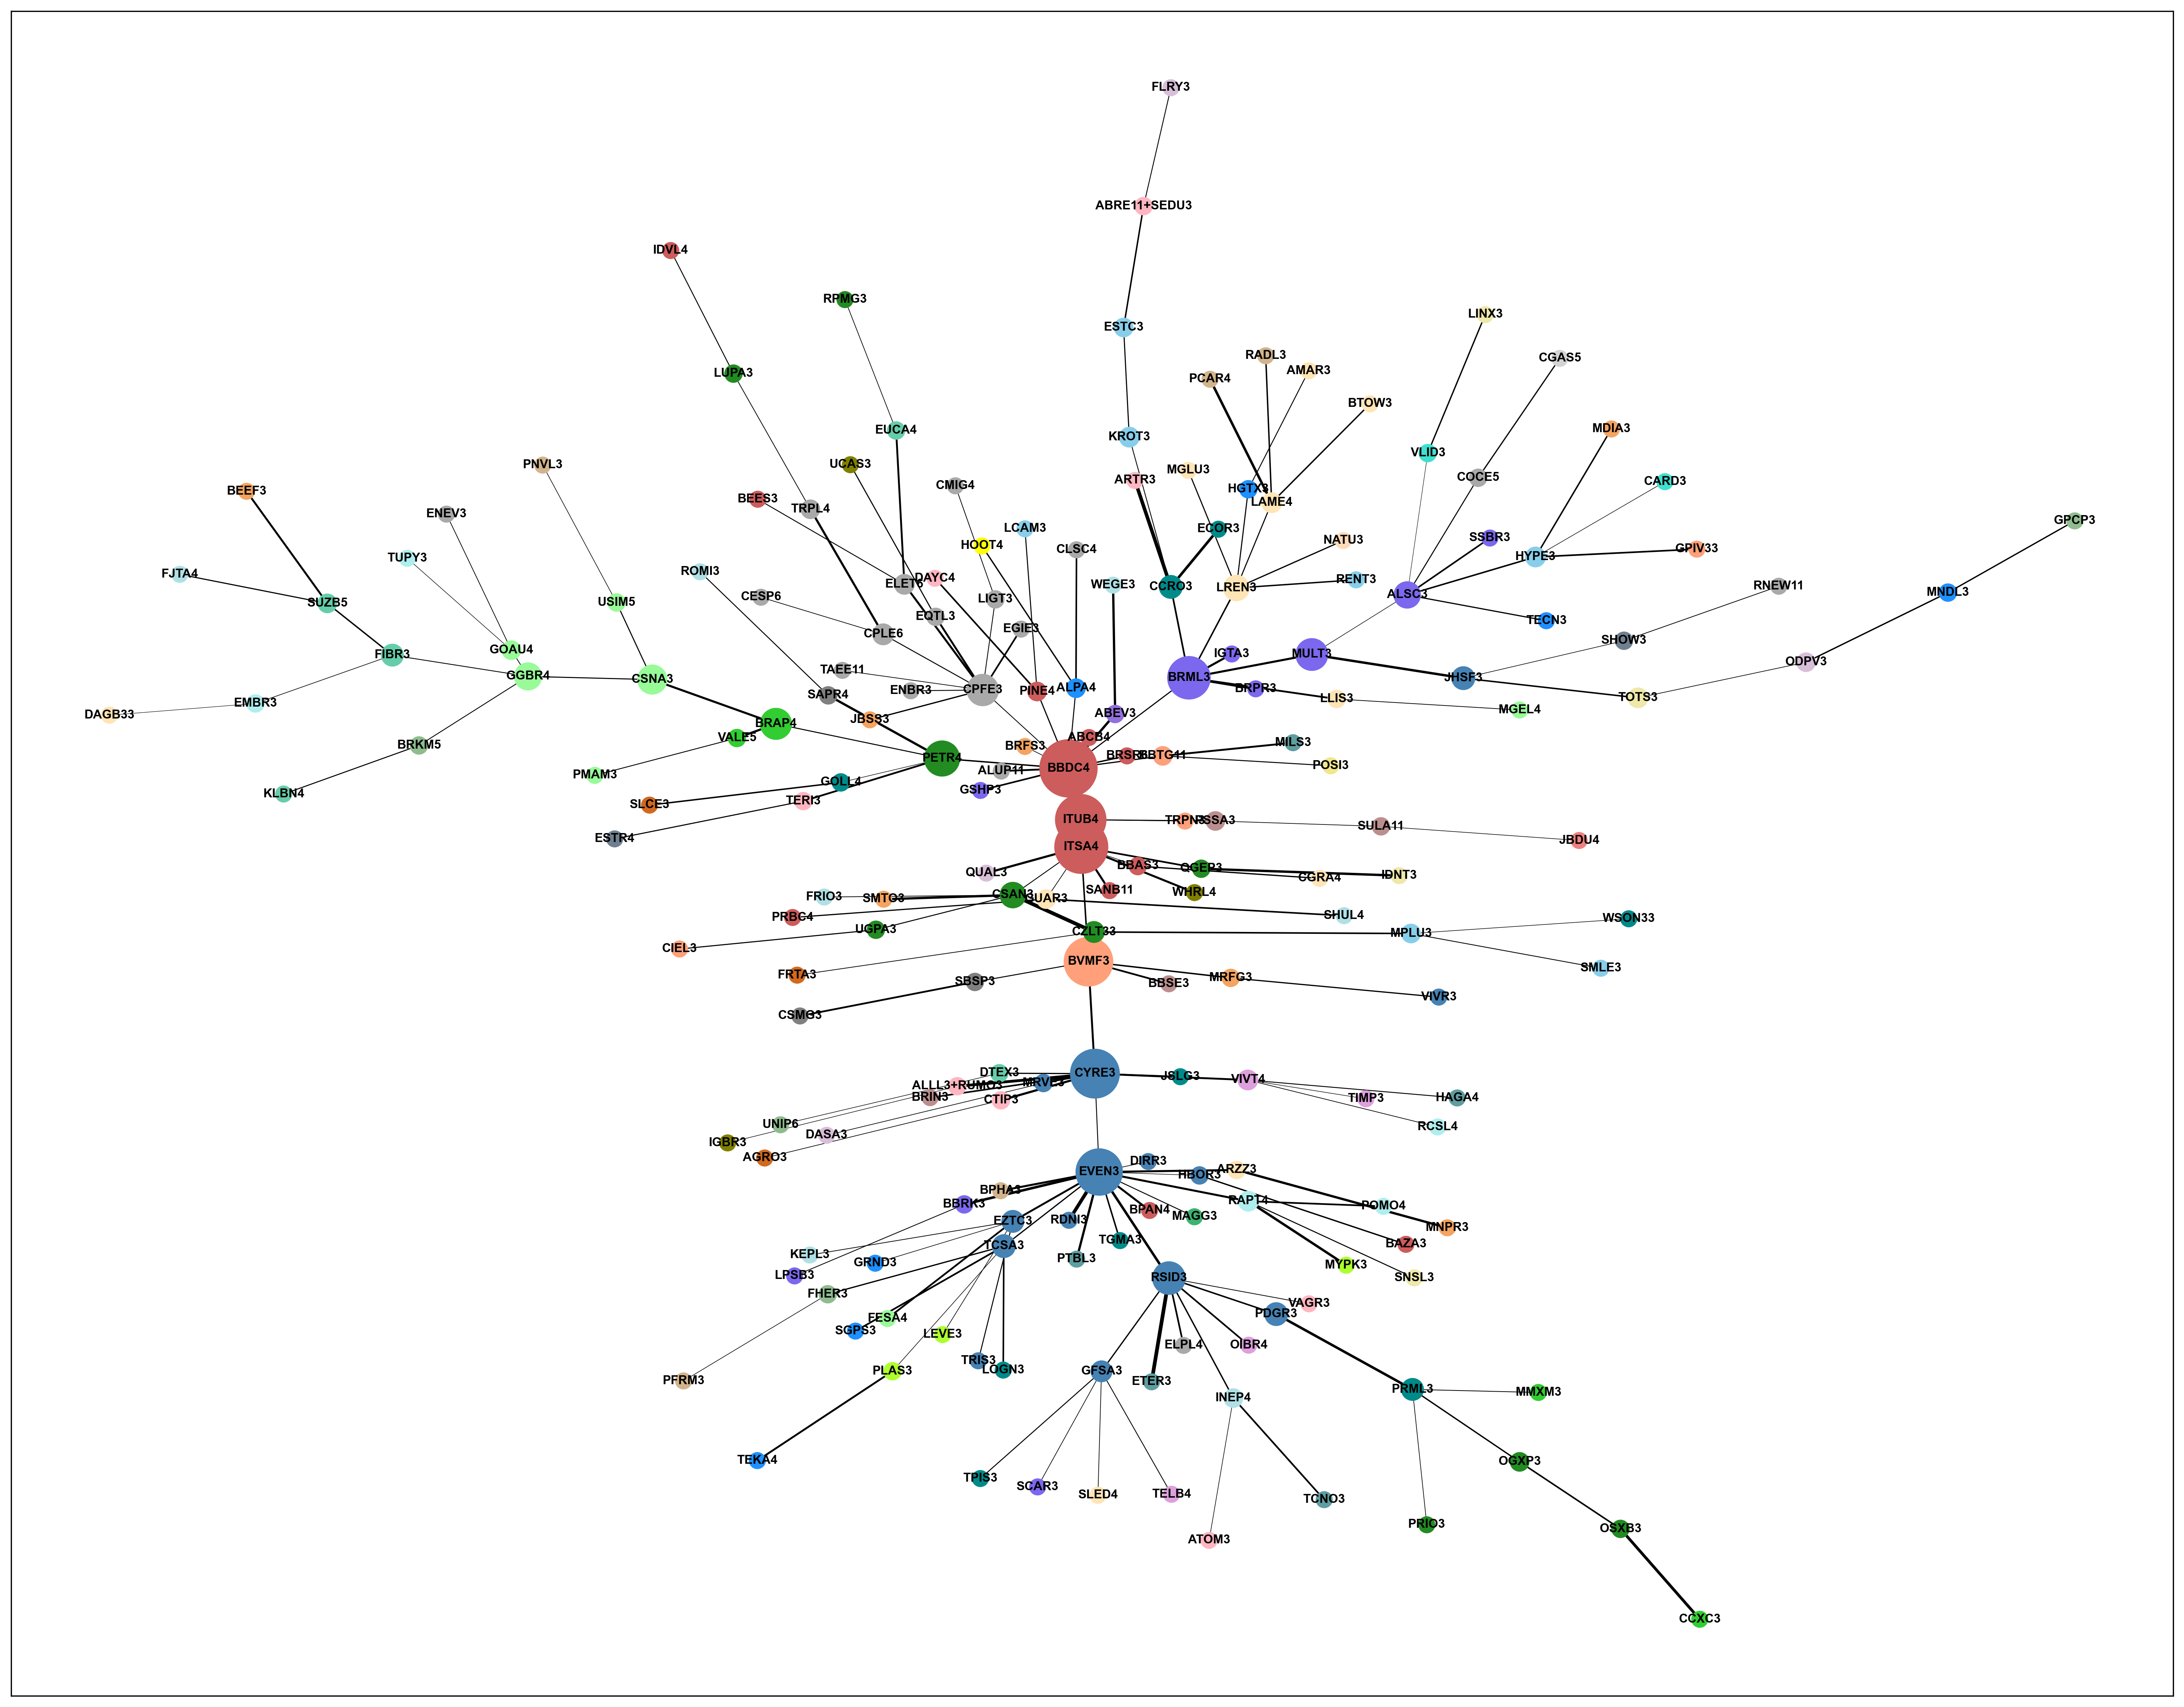

In [24]:
#Wacth out using commnity package
#import community
fig=plt.figure(figsize=(25,20), dpi=300)

#nx.transitivity(rede_pre)
edges=rede_pre.edges()

pos=nx.kamada_kawai_layout(rede_pre)
nx.draw_networkx_labels(rede_pre,pos, font_size=8, font_family='arial', font_weight='bold')
nx.draw_networkx_edges(rede_pre,pos, edgelist=edges, width=cij_pre[0]*2.5)
nx.draw_networkx_nodes(rede_pre,pos,  node_color = color_map, node_size=pd.DataFrame(nx.betweenness_centrality(rede_pre).items())[1]*1800+100)

plt.savefig("rede_pre_clusters_setores.png")

## 3.6 Drawning the Net - groups by graph modularity

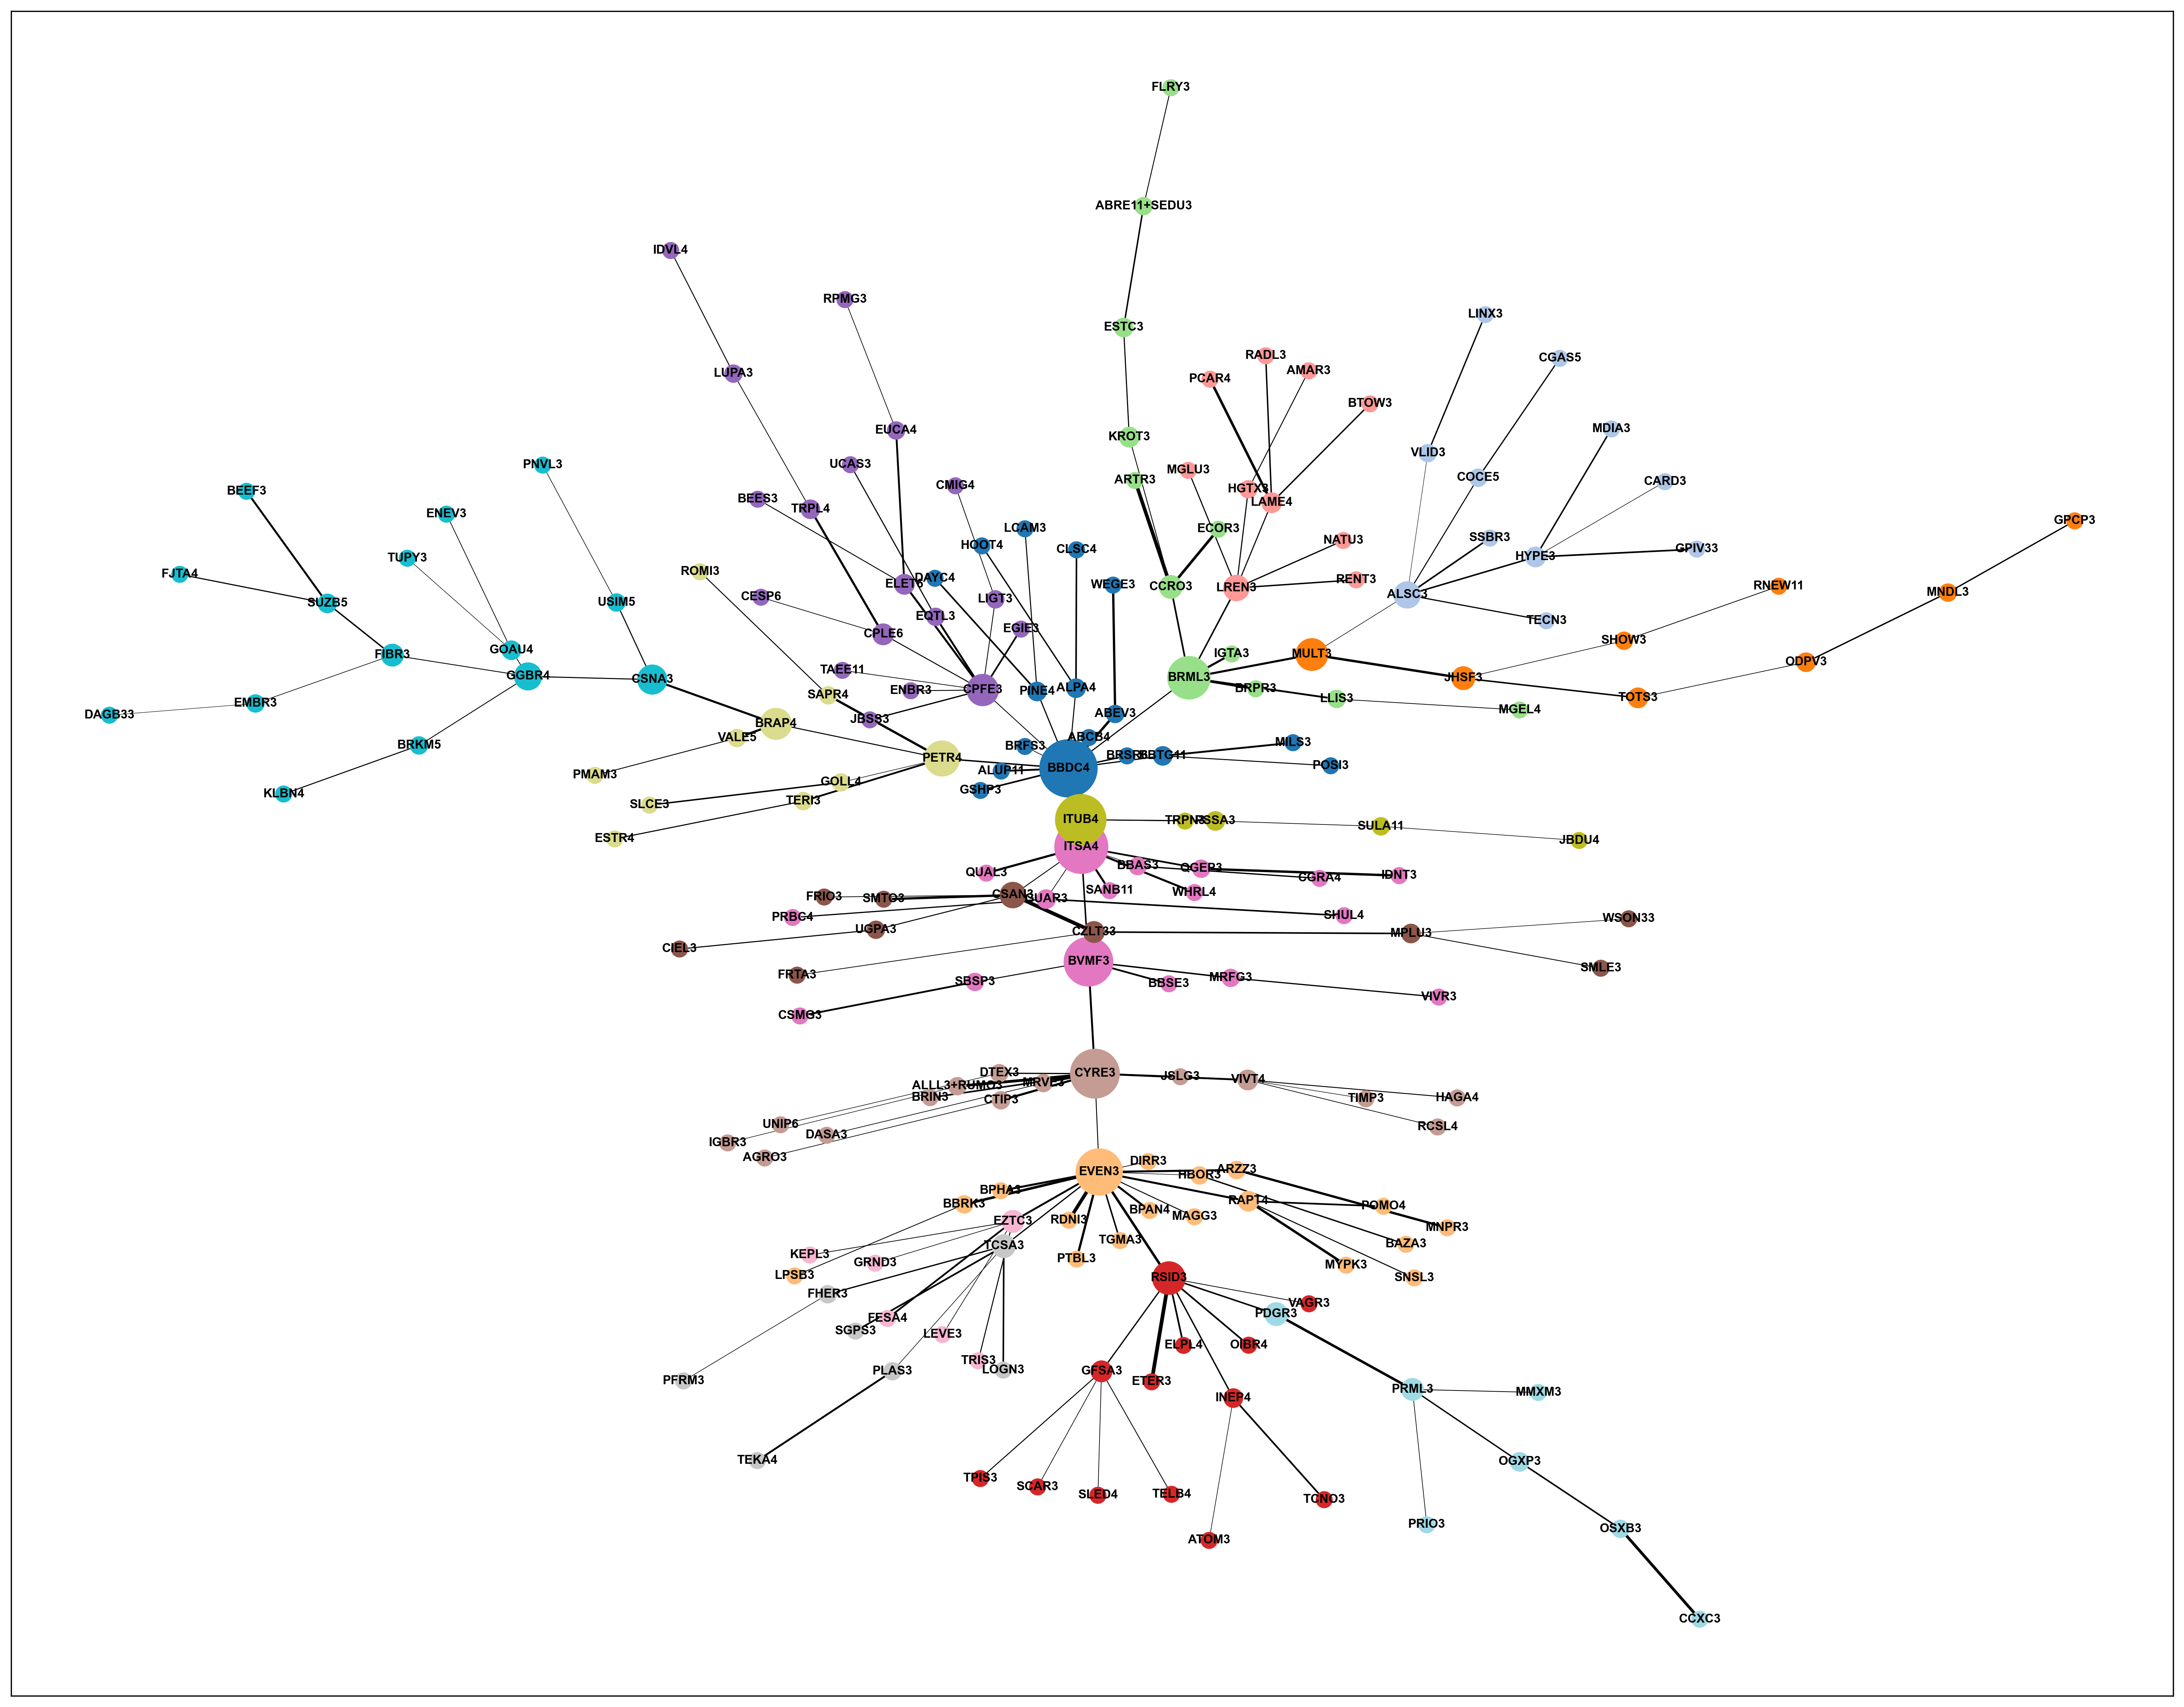

In [25]:
## Be carefull using commnity package.
# We are using the comminity_louvain.best_partition to find modulariy, not nx.best_partition.
import community
fig=plt.figure(figsize=(25,20), dpi=300)

#nx.transitivity(rede_pre)
part = community_louvain.best_partition(rede_pre)
mod = community_louvain.modularity(part,rede_pre)
values = [part.get(node) for node in rede_pre.nodes()]
edges=rede_pre.edges()

pos=nx.kamada_kawai_layout(rede_pre)
nx.draw_networkx_labels(rede_pre,pos, font_size=8, font_family='arial', font_weight='bold')
nx.draw_networkx_edges(rede_pre,pos, edgelist=edges, width=cij_pre[0]*2.5)
nx.draw_networkx_nodes(rede_pre,pos, cmap = plt.get_cmap('tab20'), node_color = values, node_size=pd.DataFrame(nx.betweenness_centrality(rede_pre).items())[1]*1800+100)
plt.savefig("rede_pre_clusters_modularidade.png")

## 3.7 Drawning the Net - groups by removing edges

In [26]:
#Nodes Contraction Function
def node_contraction(net,nodes):                               #keep the first node name as the new node name
    G=[]
    G.append(nx.contracted_nodes(net,nodes[0],nodes[1]))
    for i in range(len(nodes)-2):
        G.append(nx.contracted_nodes(G[i],nodes[0],nodes[i+2]))
    return(G[len(nodes)-2])

In [27]:
#Getting groups nodes
grupos=pd.DataFrame(part.items())
len_groups=pd.DataFrame(part.items()).drop_duplicates(1)
groups=[]
for i in range(len(len_groups)):
    groups.append(grupos[grupos[1]==i][0].values)
len_groups.shape

(17, 2)

In [28]:
#Applying Contraction
GG=[]
GG.append(node_contraction(rede_pre,groups[0]))
for i in range(len(groups)-1):
    GG.append(node_contraction(GG[i],groups[i+1]))
len(GG)

17

In [29]:
cluster_network=GG[len(GG)-1]

In [30]:
#Relabeling Using Max Centrality Intermediation Vertices
centralidade=pd.merge(pd.DataFrame(part.items()),pd.DataFrame(nx.betweenness_centrality(rede_pre).items()),on=0, how='left')
centralidade.columns=['nos','grupos','centralidade']
centralidade_grouped=centralidade.groupby('grupos')

In [31]:
group_names=[]
for i in range(len(centralidade_grouped)):
    group_names.append(centralidade_grouped.get_group(i)[centralidade_grouped.get_group(i)['centralidade']==max(centralidade_grouped.get_group(i)['centralidade'])]['nos'].values)
nodes_names=pd.DataFrame(group_names)[0].values

In [32]:
#nodes=[]
#for node in cluster_network.nodes:
#    nodes.append(node)
nodes=[]
for i in range(len(groups)):
    nodes.append(groups[i][0])

In [33]:
mapp={}
for i in range(len(nodes)):
        mapp.update({nodes[i]:nodes_names[i]})

In [52]:
cluster_network = nx.relabel_nodes(cluster_network,mapp)

In [53]:
#nx.draw(cluster_network, nx.kamada_kawai_layout(cluster_network),node_shape='h', with_labels=True)

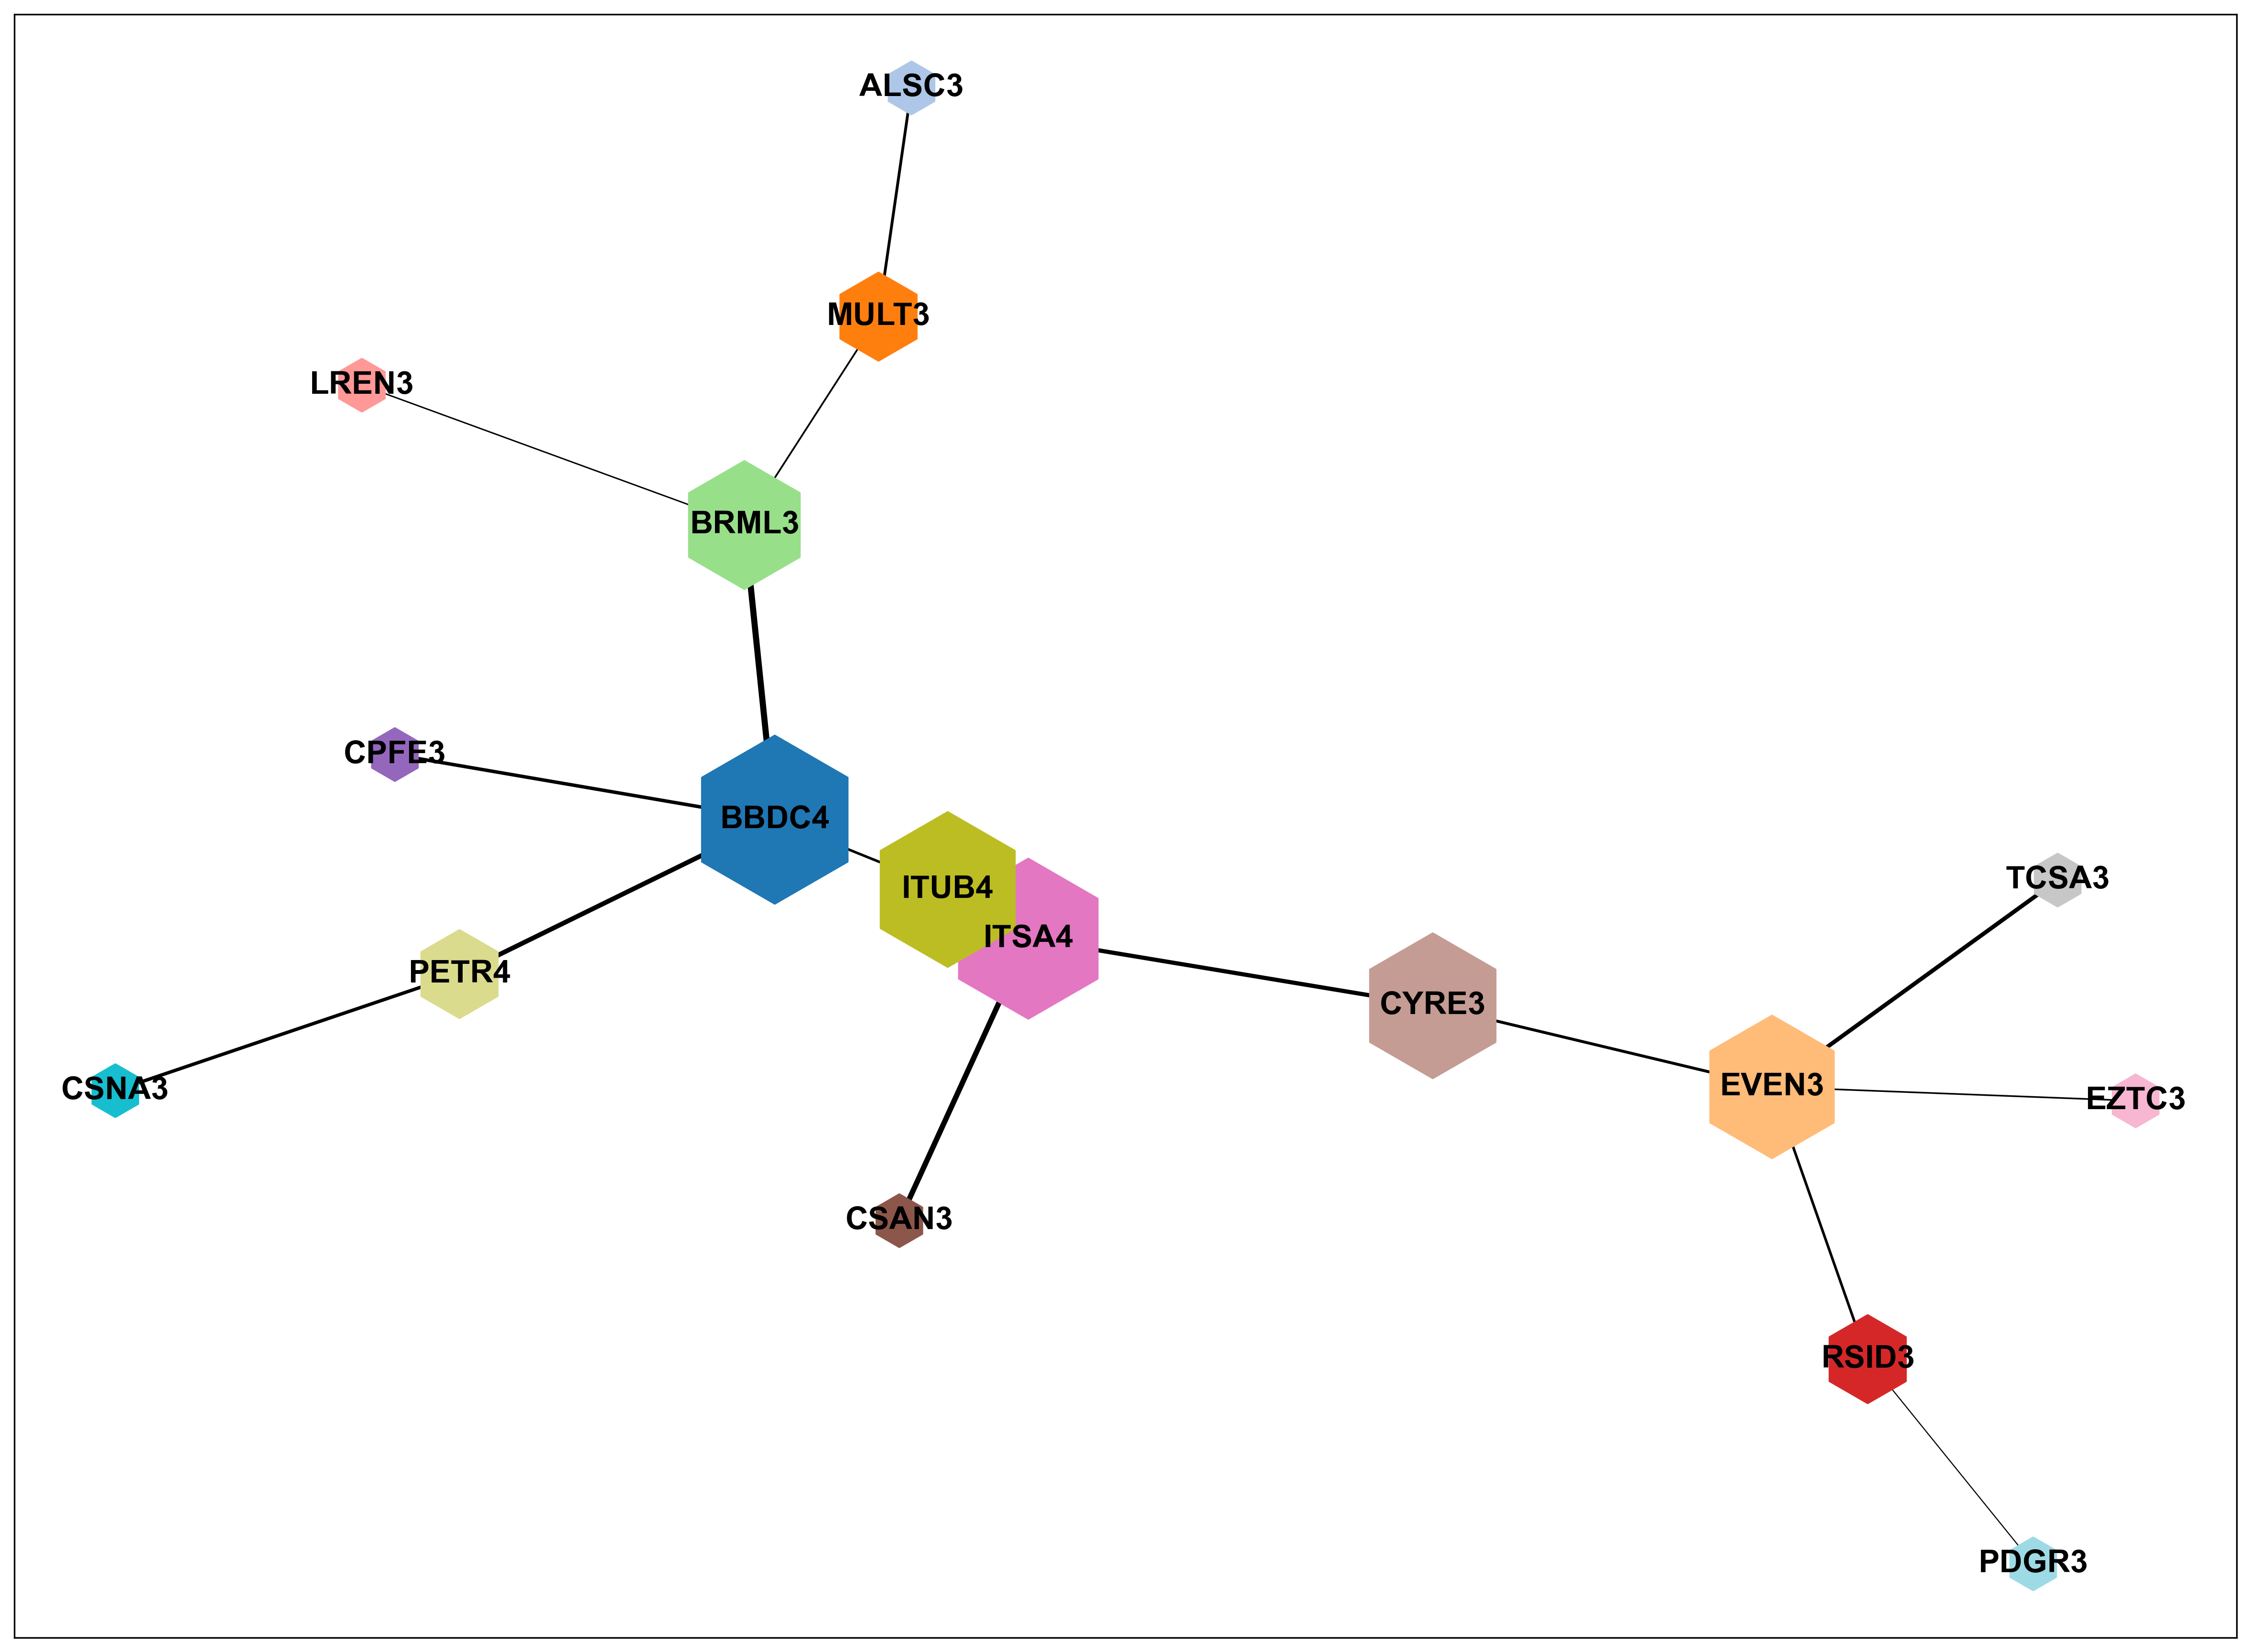

In [54]:
fig=plt.figure(figsize=(20,15), dpi=300)
pos=nx.kamada_kawai_layout(cluster_network)
values = [part.get(node) for node in cluster_network.nodes()]
nx.draw_networkx_labels(cluster_network,pos, font_size=16, font_family='arial', font_weight='bold')
nx.draw_networkx_edges(cluster_network,pos, edgelist=cluster_network.edges, width=cij_pre[0]*5)
nx.draw_networkx_nodes(cluster_network,pos,node_shape='h', cmap = plt.get_cmap('tab20'), node_color = values, node_size=pd.DataFrame(nx.betweenness_centrality(cluster_network).items())[1]*10000+700)
plt.savefig("clusters_network_pre.png")

# 4. Designing The Pos Elections Correlation Network 
This this our specific case study.However, you can use this code as example for drawing B3 correlations networks coloring by economic sectors or modularity by using Kamada Kawai layout. Our topological parameters are:
1- Nodes width are the original correlaions values
2- Nodes colors are economisc clusters or mpodularity clusters
3- Kamada Kawai Layout

In [37]:
pesos_pos=pd.DataFrame(list(nx.get_edge_attributes(rede_pos,'weight')))
dij_pos=pd.DataFrame(list(nx.get_edge_attributes(rede_pos,'weight').values()))
cij_pos=1-((dij_pos**2)/2)
pesos_pos[2]=dij_pos

In [38]:
rede_pos=refazer_rede(pesos_pos)
pesos_pos[2]=cij_pos
nos_pos=pd.DataFrame(rede_pos.nodes())
nos_pos.columns=['CÓDIGO']
nos_pos['CÓDIGO']=nos_pos['CÓDIGO'].astype(str)
setores['CÓDIGO']=setores['CÓDIGO'].astype(str)

In [39]:
nos_pos['CODIGO']=nos_pos['CÓDIGO'].apply(lambda x: clean(x))
setores['CODIGO']=setores['CÓDIGO'].apply(lambda x: clean(x))
nos_pos=nos_pos.merge(setores, on='CODIGO', how='left').fillna('Outros')
nos_pos.rename(columns={'Unnamed: 0':'SETOR ECONÔMICO', 'Unnamed: 1':'SUBSETOR','Unnamed: 2':'EMPRESA'}, inplace=True)

In [40]:
nos_pos3=pd.DataFrame(nos_pos[['CÓDIGO_x','SUBSETOR']].groupby('SUBSETOR'))
nos_pos3[0]=sectors

In [41]:
color_map_pos=[]
for node in rede_pos:
    if node in nos_pos3[1][0]['CÓDIGO_x'].values:
        color_map_pos.append('#D2691E')#chocolate
    if node in nos_pos3[1][1]['CÓDIGO_x'].values:
        color_map_pos.append('#F4A460')#sandybrown
    if node in nos_pos3[1][2]['CÓDIGO_x'].values:
        color_map_pos.append('#D8BFD8')#thistle
    if node in nos_pos3[1][3]['CÓDIGO_x'].values:
        color_map_pos.append('#ADFF2F')#greenyellow
    if node in nos_pos3[1][4]['CÓDIGO_x'].values:
        color_map_pos.append('#9370DB')#mediumpurple
    if node in nos_pos3[1][5]['CÓDIGO_x'].values:
        color_map_pos.append('#F0E68C')#khaki
    if node in nos_pos3[1][6]['CÓDIGO_x'].values:
        color_map_pos.append('#FFE4B5')#moccasin
    if node in nos_pos3[1][7]['CÓDIGO_x'].values:
        color_map_pos.append('#D2B48C')#tan
    if node in nos_pos3[1][8]['CÓDIGO_x'].values:
        color_map_pos.append('#4682B4')#steelblue
    if node in nos_pos3[1][9]['CÓDIGO_x'].values:
        color_map_pos.append('#5F9EA0')#cadetblue
    if node in nos_pos3[1][10]['CÓDIGO_x'].values:
        color_map_pos.append('#87CEEB')#skyblue
    if node in nos_pos3[1][11]['CÓDIGO_x'].values:
        color_map_pos.append('#A9A9A9')#darkgray
    if node in nos_pos3[1][12]['CÓDIGO_x'].values:
        color_map_pos.append('#7B68EE')#mediumslateblue
    if node in nos_pos3[1][13]['CÓDIGO_x'].values:
        color_map_pos.append('#D3D3D3')#lightgrey
    if node in nos_pos3[1][14]['CÓDIGO_x'].values:
        color_map_pos.append('#F08080')#lightcoral
    if node in nos_pre3[1][15]['CÓDIGO_x'].values:
        color_map_pos.append('#FFFF00')#yellow
    if node in nos_pos3[1][16]['CÓDIGO_x'].values:
        color_map_pos.append('#CD5C5C')#indianred
    if node in nos_pos3[1][17]['CÓDIGO_x'].values:
        color_map_pos.append('#66CDAA')#mediumaquamarine
    if node in nos_pos3[1][18]['CÓDIGO_x'].values:
        color_map_pos.append('#3CB371')#mediumspringgreen
    if node in nos_pos3[1][19]['CÓDIGO_x'].values:
        color_map_pos.append('#AFEEEE')#paletturquoise
    if node in nos_pos3[1][20]['CÓDIGO_x'].values:
        color_map_pos.append('#32CD32')#limegreen
    if node in nos_pos3[1][21]['CÓDIGO_x'].values:
        color_map_pos.append('#B0E0E6')#powderblue
    if node in nos_pos3[1][22]['CÓDIGO_x'].values:
        color_map_pos.append('#FFB6C1')#lightpink
    if node in nos_pos3[1][23]['CÓDIGO_x'].values:
        color_map_pos.append('#228B22')#forestgreen
    if node in nos_pos3[1][24]['CÓDIGO_x'].values:
        color_map_pos.append('#BC8F8F')#rosybrown
    if node in nos_pos3[1][25]['CÓDIGO_x'].values:
        color_map_pos.append('#FFDAB9')#peachpuff
    if node in nos_pos3[1][26]['CÓDIGO_x'].values:
        color_map_pos.append('#EEE8AA')#palegoldenrod
    if node in nos_pos3[1][27]['CÓDIGO_x'].values:
        color_map_pos.append('#8FBC8F')#darkseagreen
    if node in nos_pos3[1][28]['CÓDIGO_x'].values:
        color_map_pos.append('#40E0D0')#turqoise
    if node in nos_pos3[1][29]['CÓDIGO_x'].values:
        color_map_pos.append('#FFA07A')#lightsalmon
    if node in nos_pos3[1][30]['CÓDIGO_x'].values:
        color_map_pos.append('#98FB98')#palegreen
    if node in nos_pos3[1][31]['CÓDIGO_x'].values:
        color_map_pos.append('#1E90FF')#dodgerblue
    if node in nos_pos3[1][32]['CÓDIGO_x'].values:
        color_map_pos.append('#DDA0DD')#plum
    if node in nos_pos3[1][33]['CÓDIGO_x'].values:
        color_map_pos.append('#008B8B')#darkcyan
    if node in nos_pos3[1][34]['CÓDIGO_x'].values:
        color_map_pos.append('#808000')#olive
    if node in nos_pos3[1][35]['CÓDIGO_x'].values:
        color_map_pos.append('#708090')#slategrey
    if node in nos_pos3[1][36]['CÓDIGO_x'].values:
        color_map_pos.append('#808080')#gray

## 4.1 Drawning the Net - groups by economy subsectors

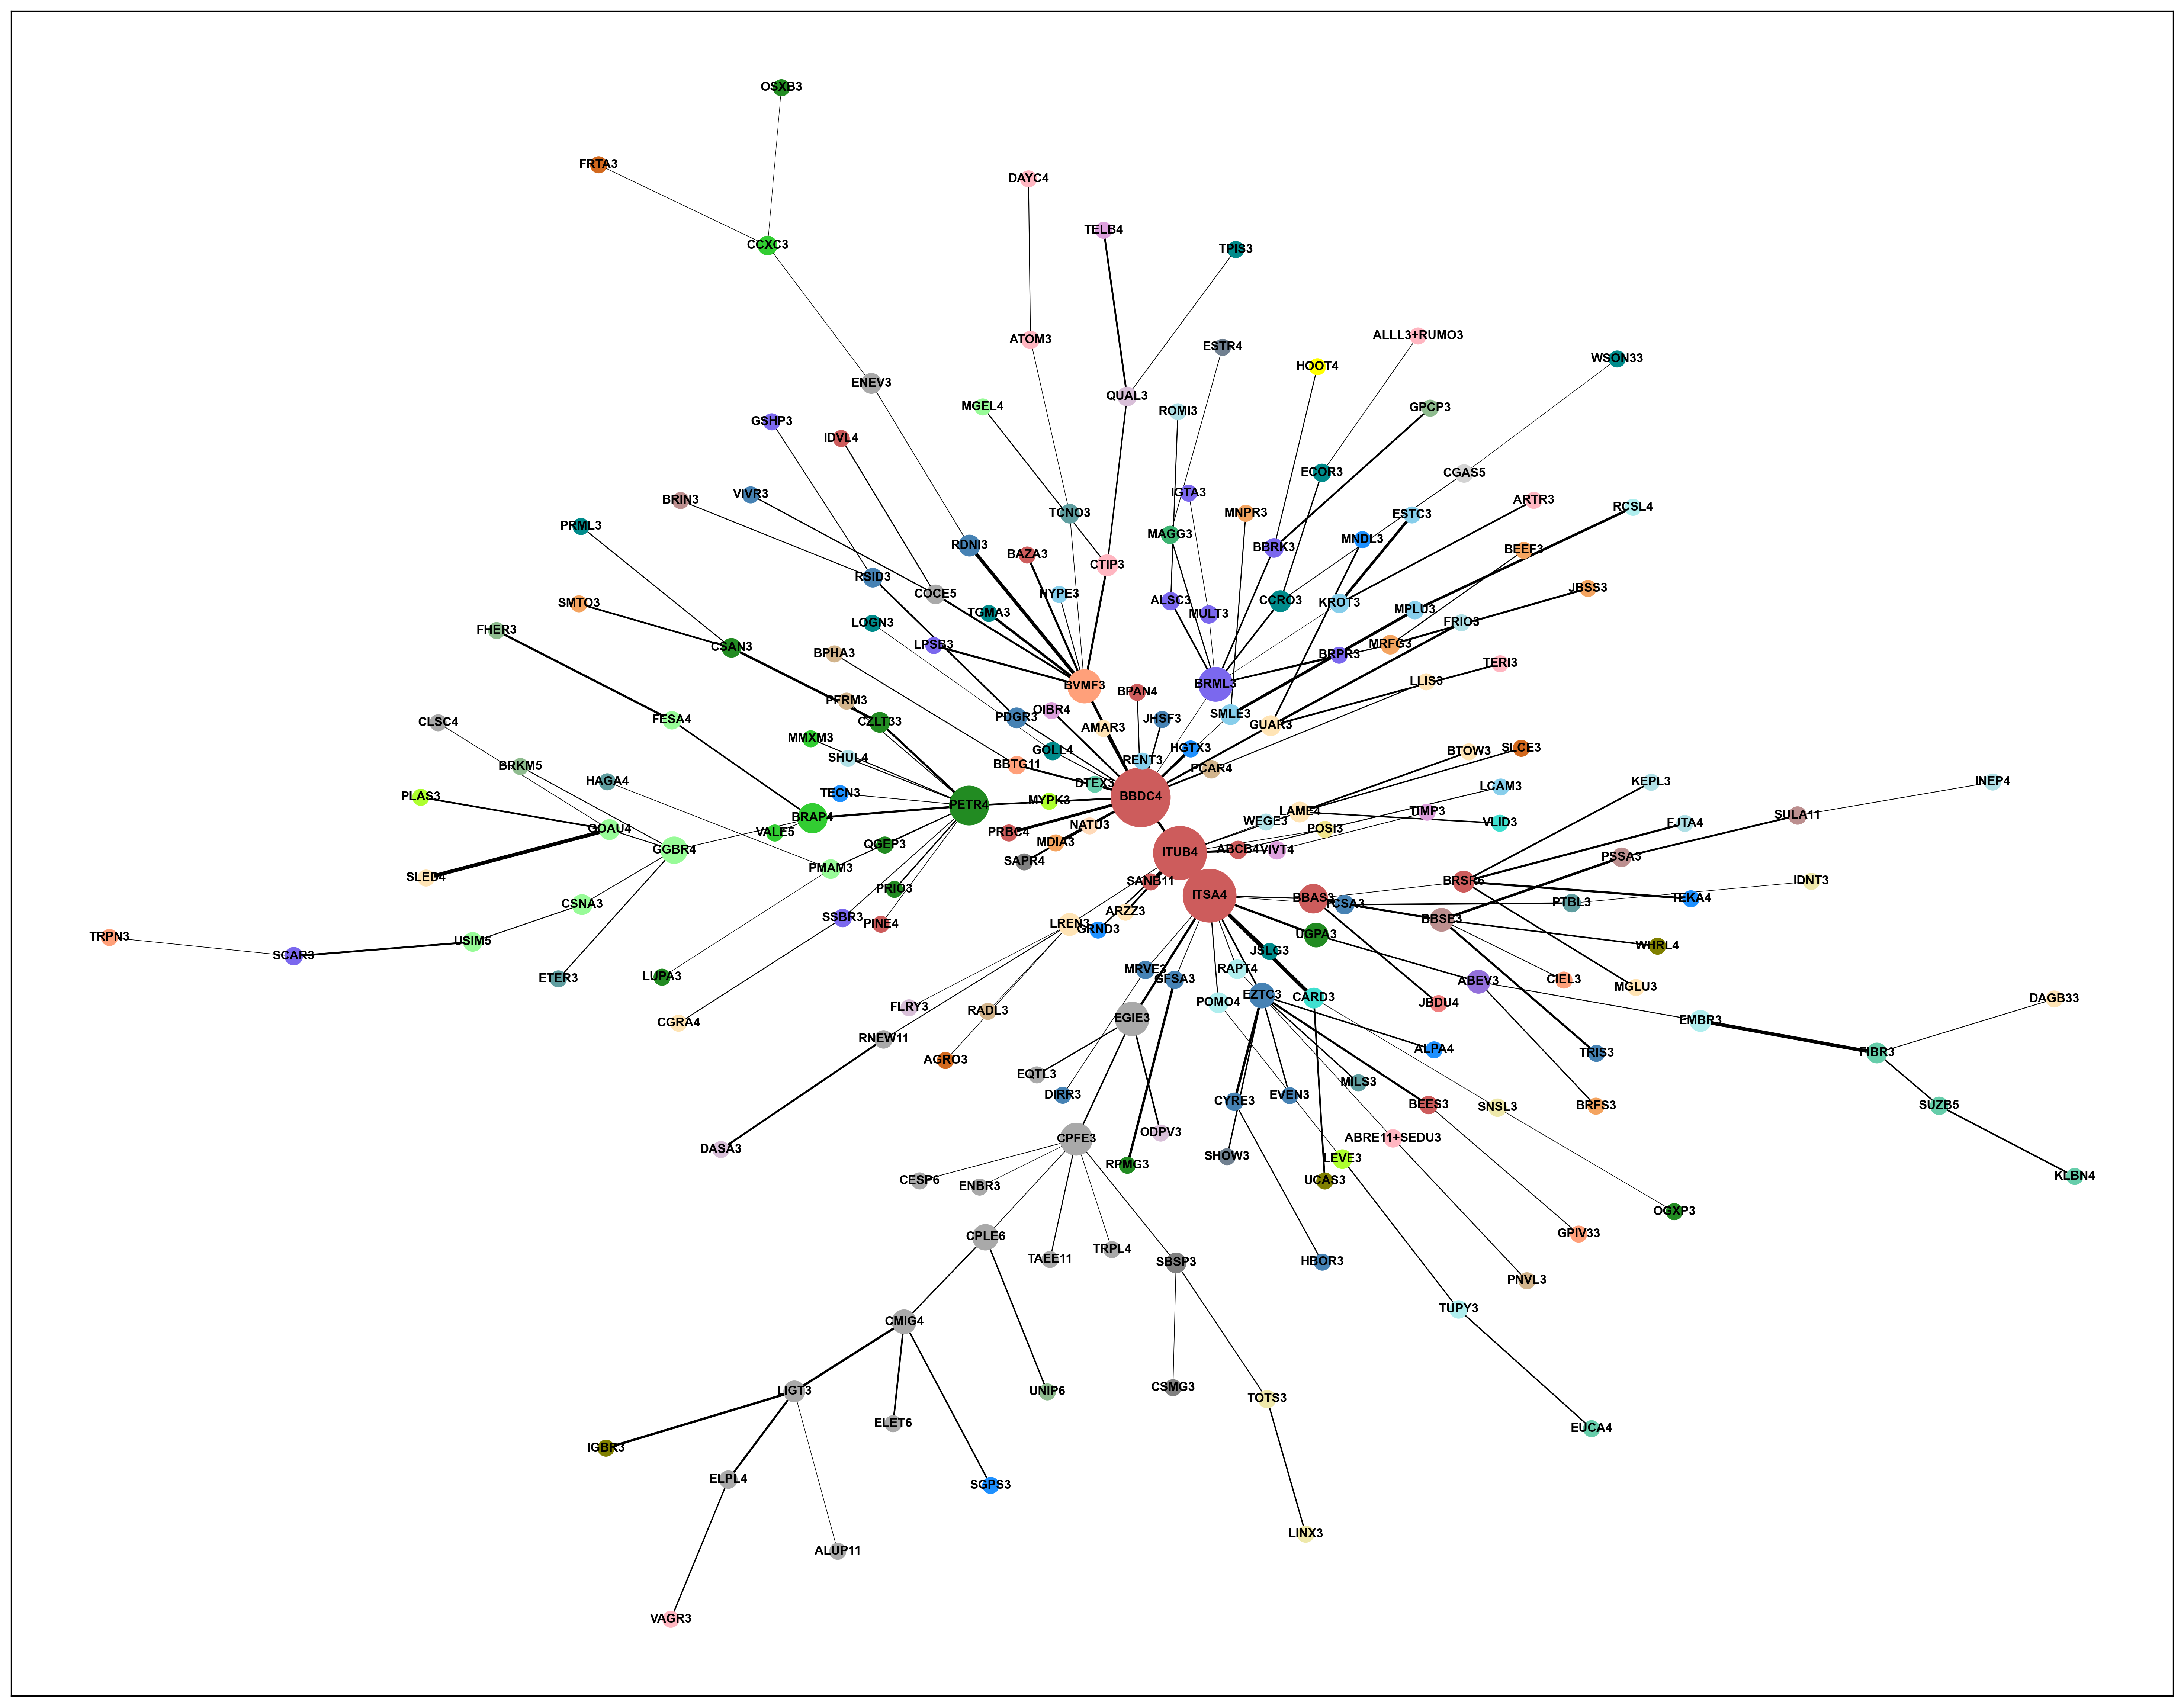

In [42]:
import community
fig=plt.figure(figsize=(25,20), dpi=300)

#nx.transitivity(rede_pre)
edges=rede_pos.edges()

pos1=nx.kamada_kawai_layout(rede_pos)
nx.draw_networkx_labels(rede_pos,pos1, font_size=8, font_family='arial', font_weight='bold')
nx.draw_networkx_edges(rede_pos,pos1, edgelist=edges, width=cij_pre[0]*2.5)
nx.draw_networkx_nodes(rede_pos,pos1,node_color = color_map_pos,  node_size=pd.DataFrame(nx.betweenness_centrality(rede_pos).items())[1]*1800+100)
plt.savefig("rede_pre_clusters_setores_pos.png")

## 4.2 Drawning the Net - groups by graph modularity

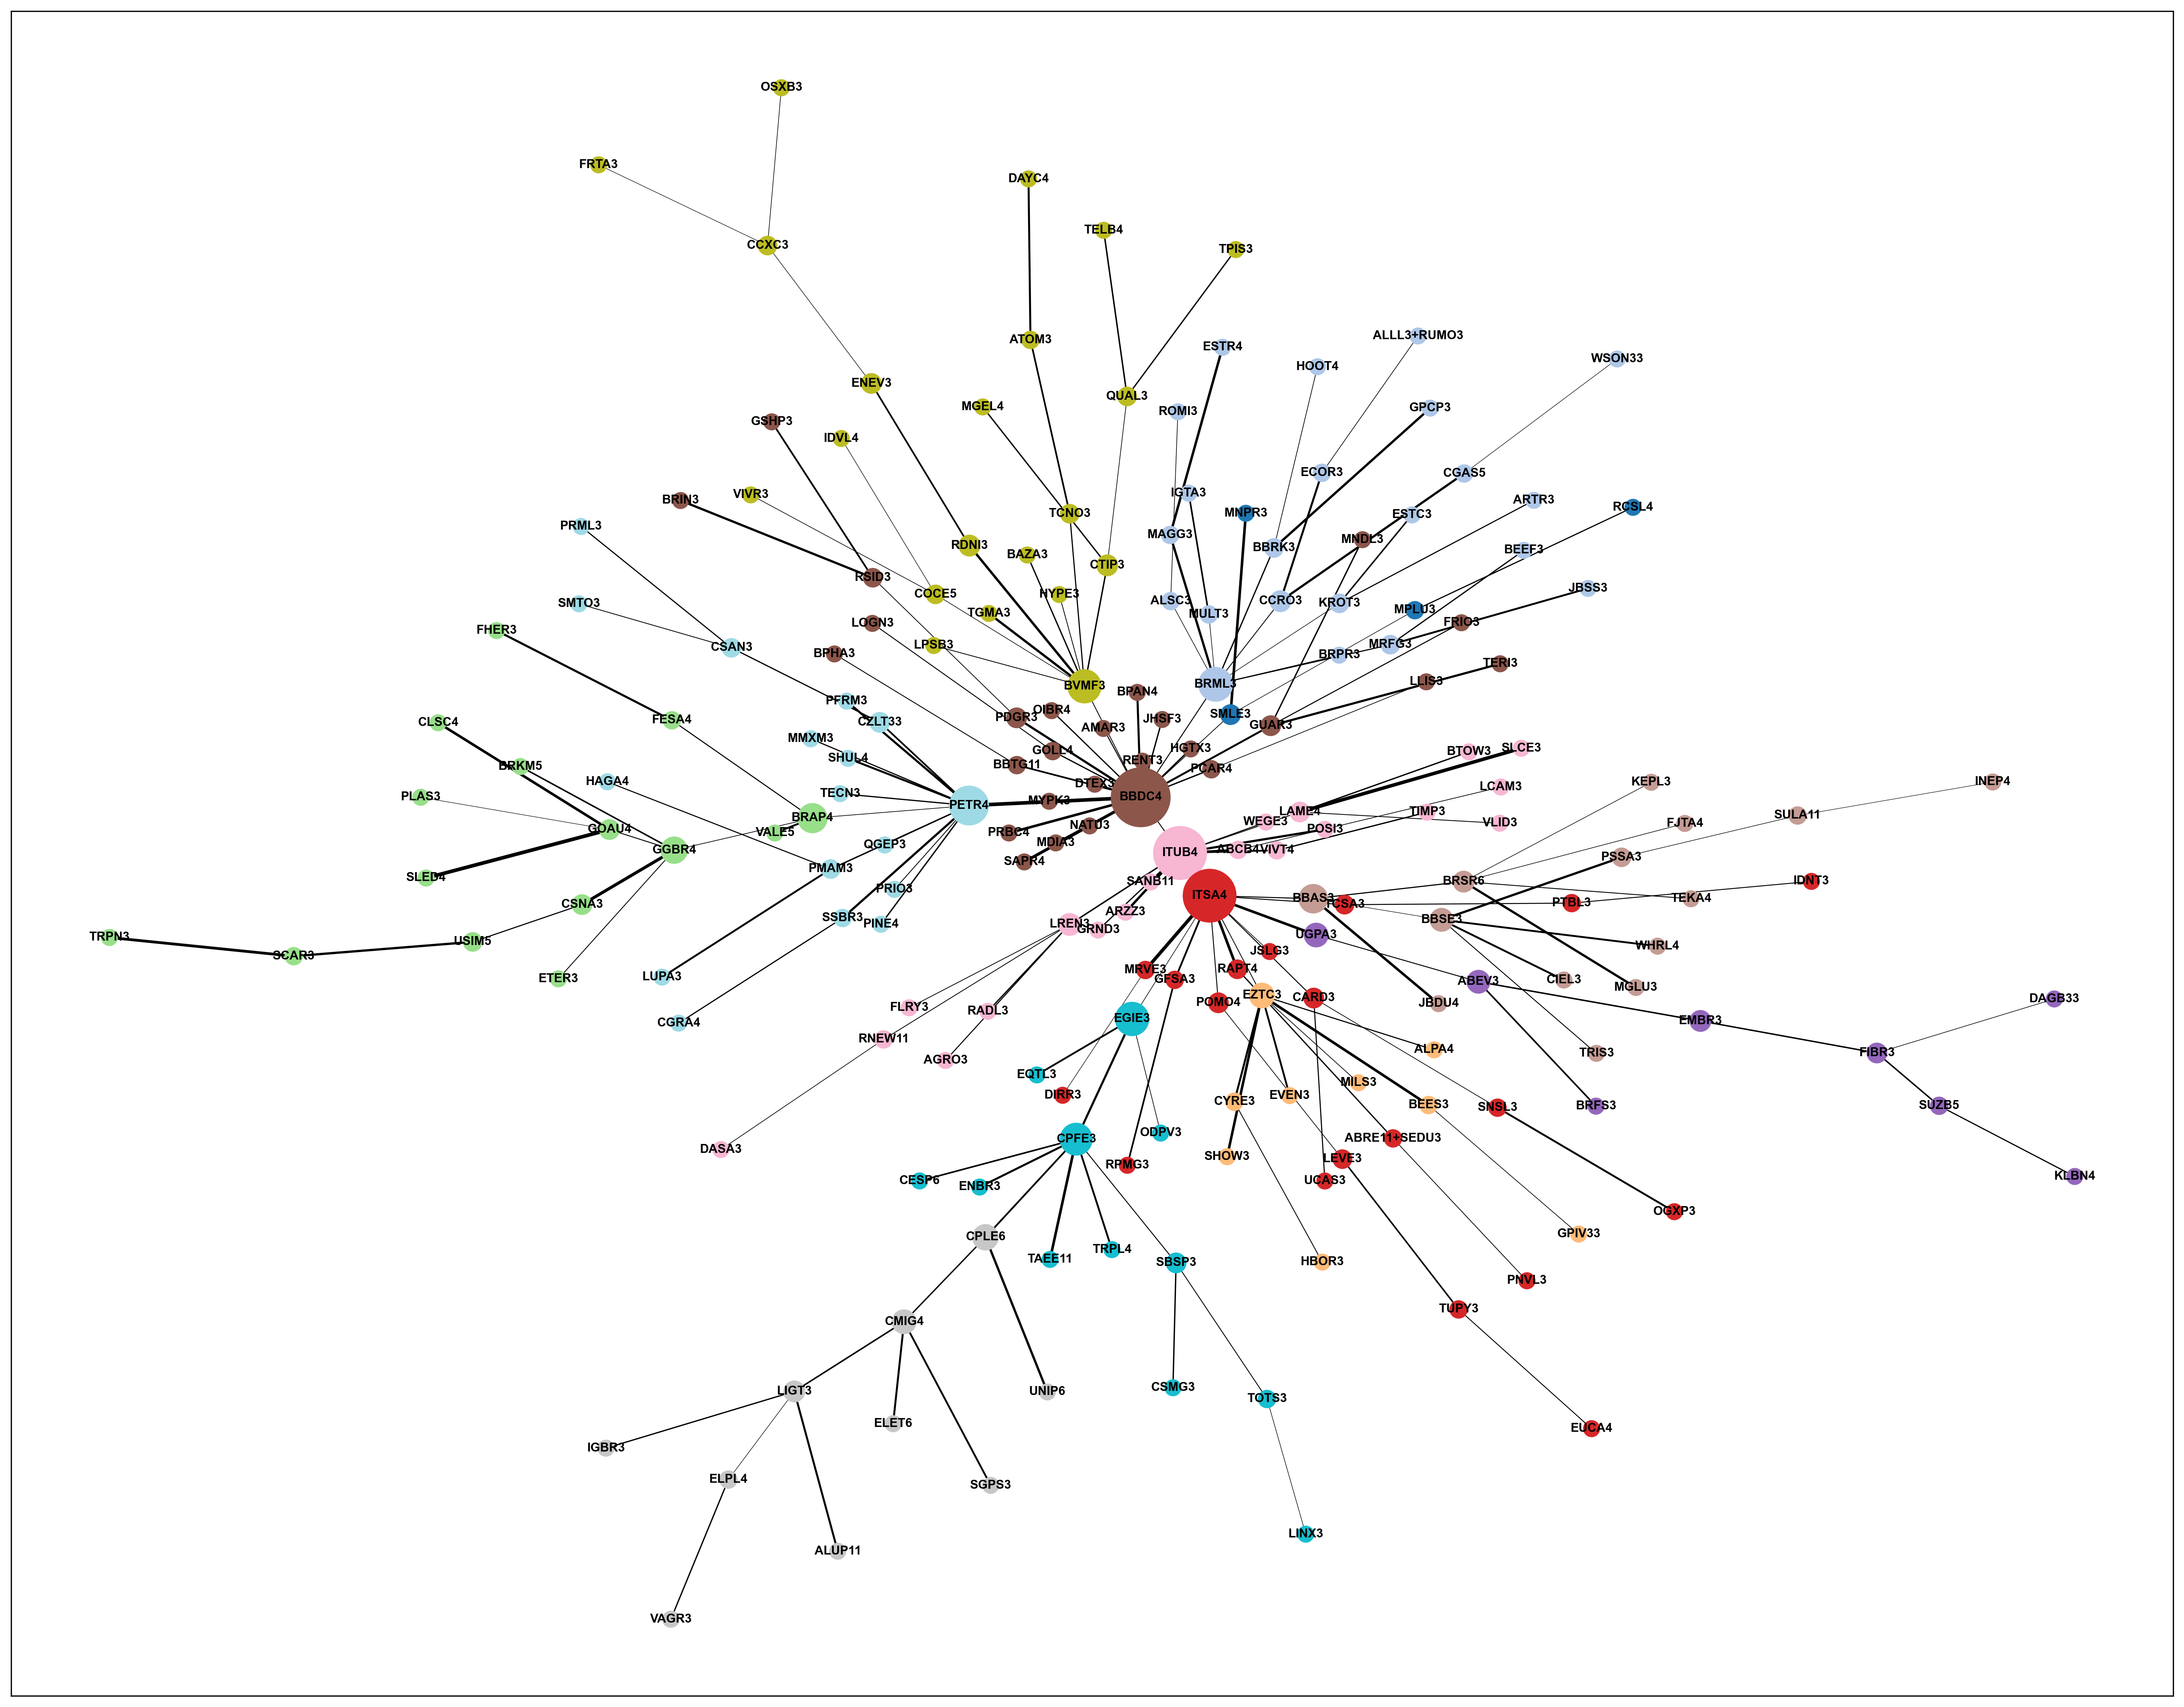

In [43]:
import community
fig=plt.figure(figsize=(25,20), dpi=300)

#nx.transitivity(rede_pre)
part_pos = community_louvain.best_partition(rede_pos)
mod_pos = community_louvain.modularity(part_pos,rede_pos)
values_pos = [part_pos.get(node) for node in rede_pos.nodes()]
edges_pos=rede_pos.edges()

pos1=nx.kamada_kawai_layout(rede_pos)
nx.draw_networkx_labels(rede_pos,pos1, font_size=8, font_family='arial', font_weight='bold')
nx.draw_networkx_edges(rede_pos,pos1, edgelist=edges_pos, width=cij_pos[0]*2.5)
nx.draw_networkx_nodes(rede_pos,pos1, cmap = plt.get_cmap('tab20'), node_color = values_pos, node_size=pd.DataFrame(nx.betweenness_centrality(rede_pos).items())[1]*1800+100)
plt.savefig("rede_pre_clusters_modularidade_pos.png")

## 4.3 Drawning the Net - groups by removing edges

In [44]:
#Getting groups nodes
grupos_pos=pd.DataFrame(part_pos.items())
len_groups_pos=pd.DataFrame(part_pos.items()).drop_duplicates(1)
groups_pos=[]
for i in range(len(len_groups_pos)):
    groups_pos.append(grupos_pos[grupos_pos[1]==i][0].values)
len_groups_pos.shape

#Applying Contraction
GG_pos=[]
GG_pos.append(node_contraction(rede_pos,groups_pos[0]))
for i in range(len(groups_pos)-1):
    GG_pos.append(node_contraction(GG_pos[i],groups_pos[i+1]))
len(GG_pos)
cluster_network_pos=GG_pos[len(GG_pos)-1]

In [45]:
groups_pos

[array(['SMLE3', 'MNPR3', 'MPLU3', 'RCSL4'], dtype=object),
 array(['ALSC3', 'BRML3', 'ROMI3', 'ARTR3', 'KROT3', 'BBRK3', 'GPCP3',
        'HOOT4', 'CCRO3', 'MAGG3', 'MRFG3', 'MULT3', 'BRPR3', 'ECOR3',
        'CGAS5', 'WSON33', 'ALLL3+RUMO3', 'ESTC3', 'ESTR4', 'IGTA3',
        'JBSS3', 'BEEF3'], dtype=object),
 array(['ALPA4', 'EZTC3', 'BEES3', 'GPIV33', 'CYRE3', 'HBOR3', 'EVEN3',
        'MILS3', 'SHOW3'], dtype=object),
 array(['BRAP4', 'FESA4', 'GGBR4', 'VALE5', 'BRKM5', 'CLSC4', 'GOAU4',
        'ETER3', 'FHER3', 'CSNA3', 'PLAS3', 'SLED4', 'SCAR3', 'TRPN3',
        'USIM5'], dtype=object),
 array(['ITSA4', 'CARD3', 'SNSL3', 'UCAS3', 'PNVL3', 'ABRE11+SEDU3',
        'DIRR3', 'MRVE3', 'EUCA4', 'TUPY3', 'GFSA3', 'RPMG3', 'IDNT3',
        'PTBL3', 'JSLG3', 'RAPT4', 'TCSA3', 'POMO4', 'LEVE3', 'OGXP3'],
       dtype=object),
 array(['ABEV3', 'BRFS3', 'UGPA3', 'EMBR3', 'DAGB33', 'FIBR3', 'SUZB5',
        'KLBN4'], dtype=object),
 array(['BPAN4', 'BBDC4', 'BRIN3', 'RSID3', 'BPHA3', 'BBTG1

In [46]:
cluster_network_pos.nodes

NodeView(('ABCB4', 'ALSC3', 'ALPA4', 'ALUP11', 'BAZA3', 'ABEV3', 'BPAN4', 'BRSR6', 'PETR4', 'SMLE3', 'BRAP4', 'ITSA4', 'CESP6'))

In [55]:
#Relabeling Using Max Centrality Intermediation Vertices
centralidade_pos=pd.merge(pd.DataFrame(part_pos.items()),pd.DataFrame(nx.betweenness_centrality(rede_pos).items()),on=0, how='left')
centralidade_pos.columns=['nos','grupos','centralidade']
centralidade_grouped_pos=centralidade_pos.groupby('grupos')

group_names_pos=[]
for i in range(len(centralidade_grouped_pos)):
    group_names_pos.append(centralidade_grouped_pos.get_group(i)[centralidade_grouped_pos.get_group(i)['centralidade']==max(centralidade_grouped_pos.get_group(i)['centralidade'])]['nos'].values)
nodes_names_pos=pd.DataFrame(group_names_pos)[0].values

nodes_pos=[]
for i in range(len(groups_pos)):
    nodes_pos.append(groups_pos[i][0])
mapp_pos={}
for i in range(len(nodes_pos)):
        mapp_pos.update({nodes_pos[i]:nodes_names_pos[i]})
cluster_network_pos = nx.relabel_nodes(cluster_network_pos,mapp_pos)

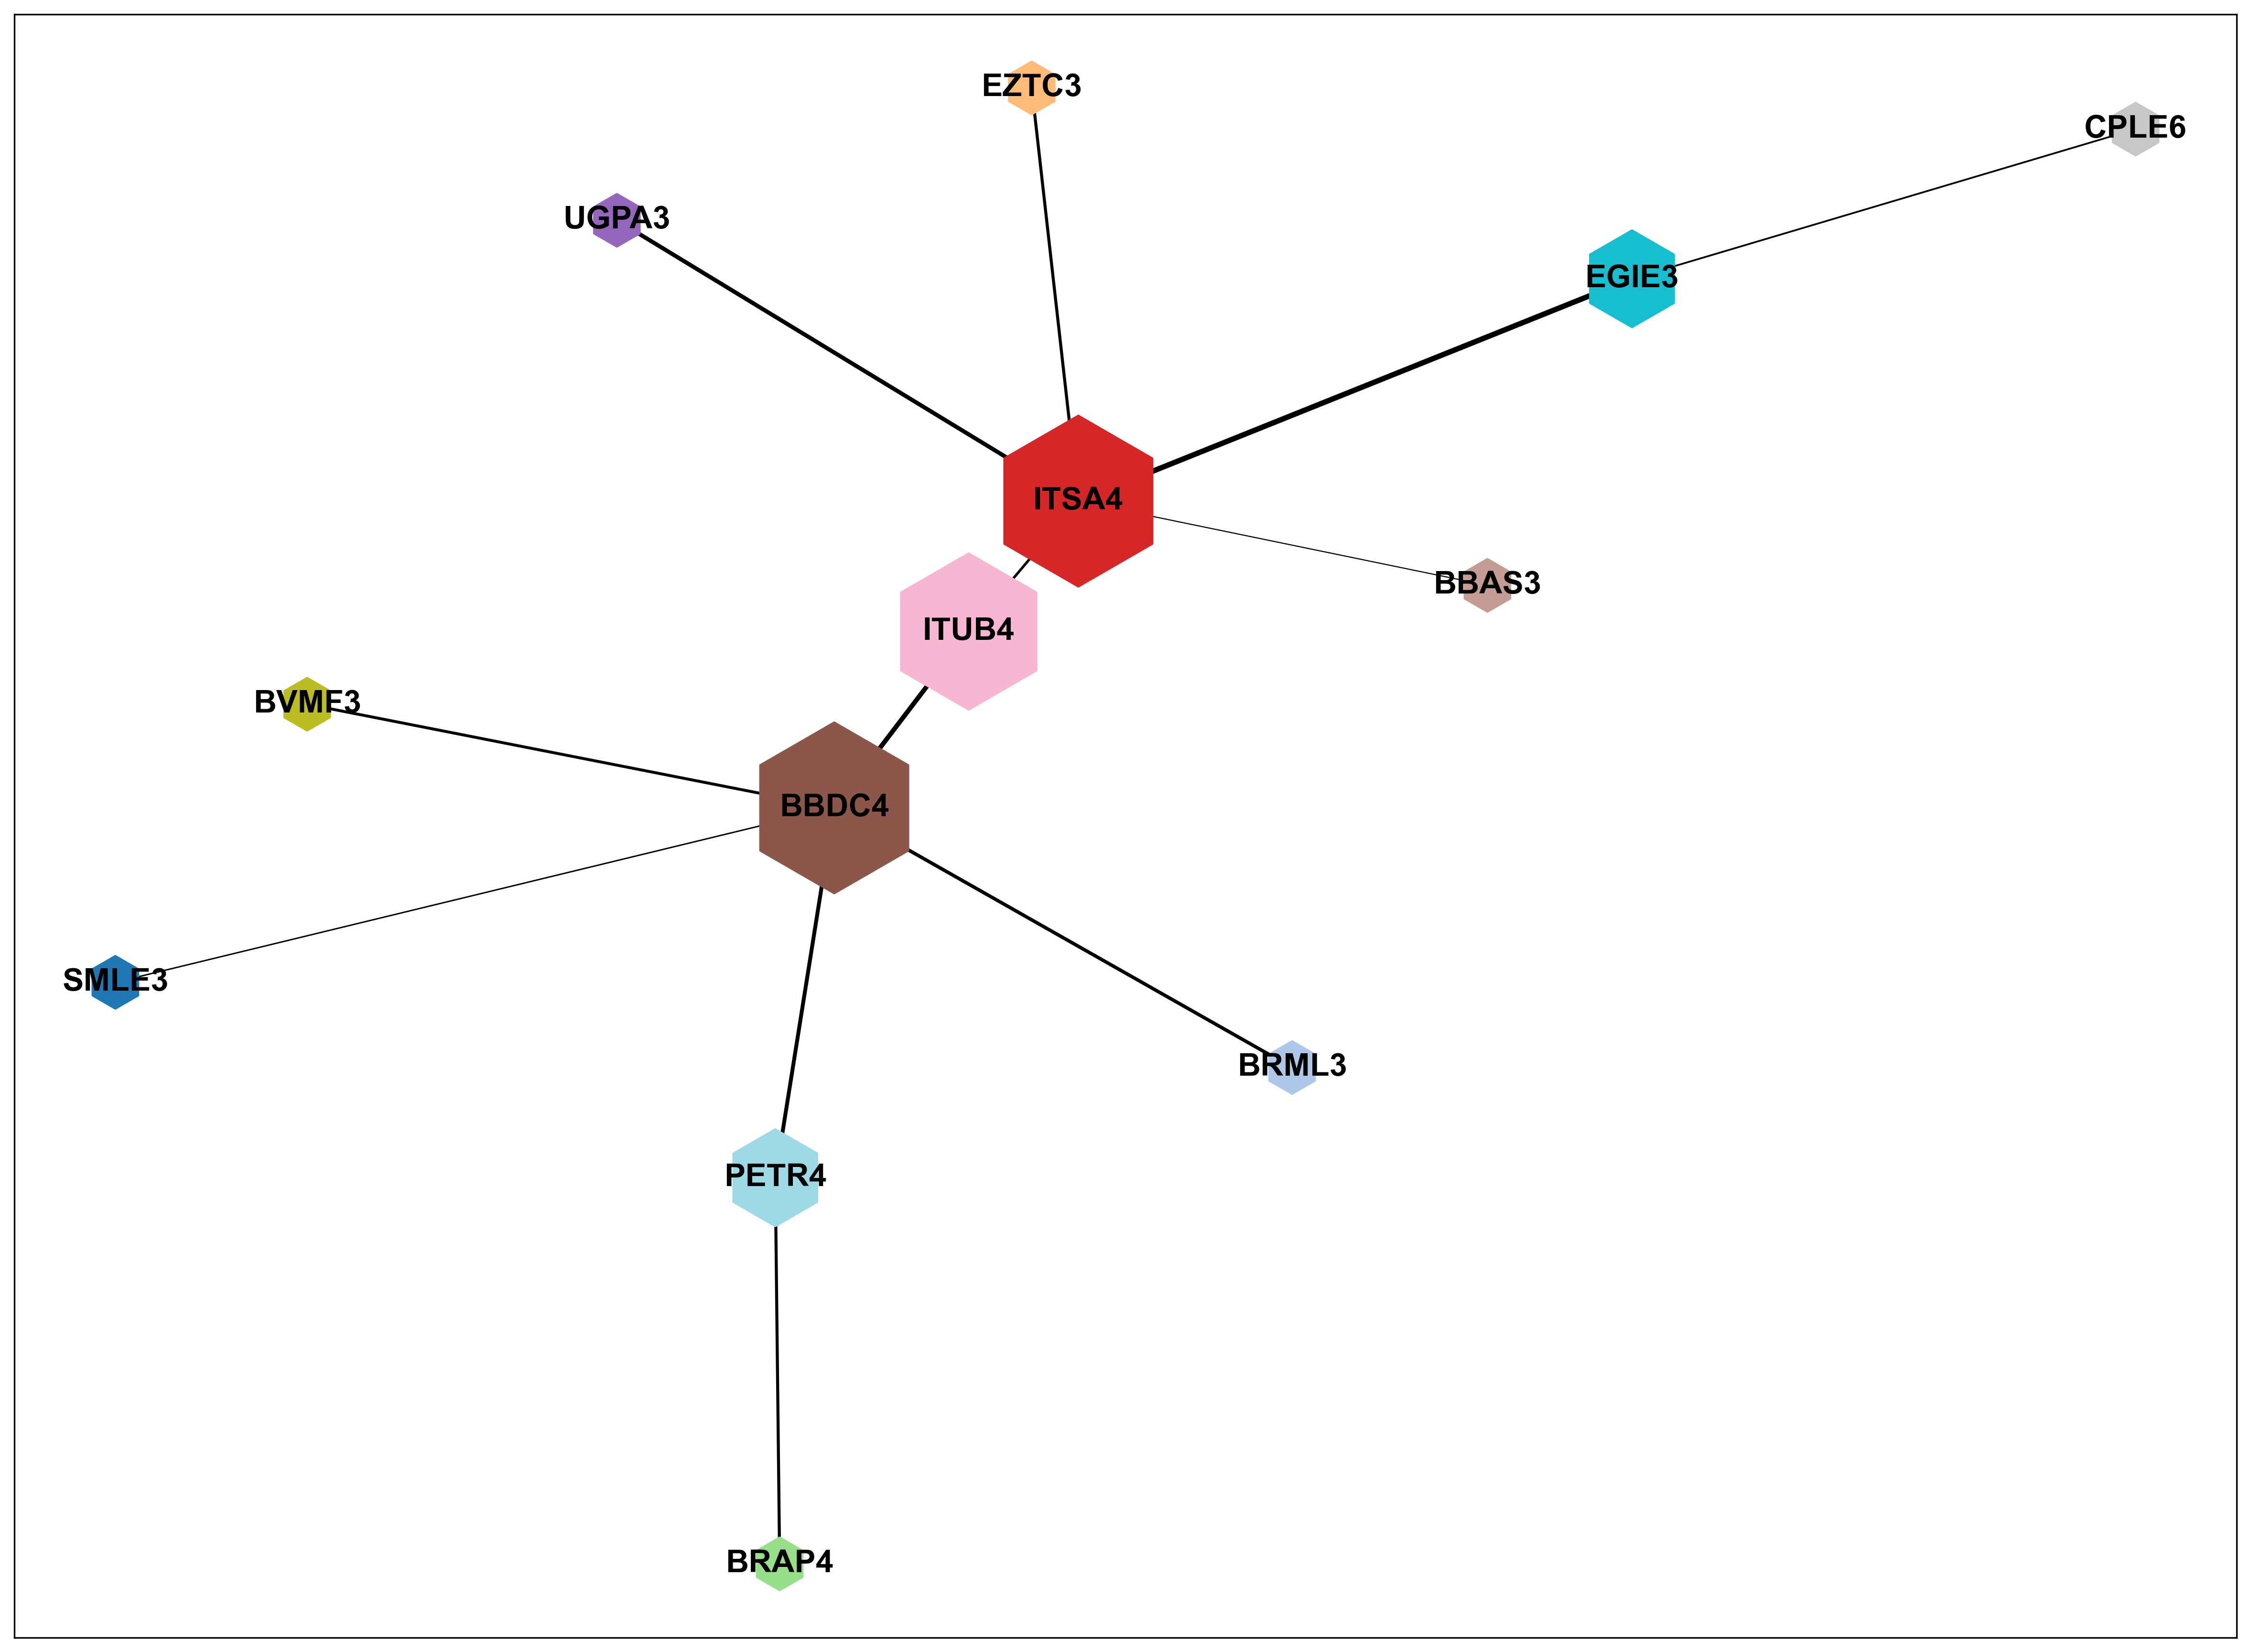

In [59]:
fig=plt.figure(figsize=(20,15), dpi=300)
pos1=nx.kamada_kawai_layout(cluster_network_pos)
values_pos = [part_pos.get(node_pos) for node_pos in cluster_network_pos.nodes()]
nx.draw_networkx_labels(cluster_network_pos,pos1, font_size=16, font_family='arial', font_weight='bold')
nx.draw_networkx_edges(cluster_network_pos,pos1, edgelist=cluster_network_pos.edges, width=cij_pre[0]*5)
nx.draw_networkx_nodes(cluster_network_pos,pos1,node_shape='h', cmap = plt.get_cmap('tab20'), node_color = values_pos, node_size=pd.DataFrame(nx.betweenness_centrality(cluster_network_pos).items())[1]*10000+700)
plt.savefig("clusters_network_pos.png")